In [1]:
import pandas as pd
import numpy as np

# This project referenced from https://realpython.com/pandas-project-gradebook/ . I just made it in my style.
# all data I use for this project taken from that link 

In [2]:
roster = pd.read_csv("roster.csv",
                    converters={"NetID": str.lower, "Email Address": str.lower},
                    usecols=["Section", "Email Address", "NetID"],
                    index_col="NetID")

In [3]:
roster.head(10)

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2
rxs30280,richard.saunders@univ.edu,1
dma58910,daisy.anderson@univ.edu,2
hsw06874,holly.watson@univ.edu,2
bkr19538,brandy.reilly@univ.edu,2


In [4]:
roster.shape

(150, 2)

In [5]:
hw_exam_grades = pd.read_csv("hw_exam_grades.csv",
                            converters={"SID": str.lower},
                            usecols= lambda x: "Submission" not in x,
                            index_col="SID")

In [6]:
hw_exam_grades.head()

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100


In [7]:
hw_exam_grades.shape

(150, 28)

In [8]:
quiz_grades = pd.DataFrame()
for i in range(5):
    quiz_name = "Quiz " + str(i+1)
    quiz = pd.read_csv("quiz_" + str(i+1) + "_grades.csv",
                      usecols = ["Email", "Grade"],
                      index_col = "Email",
                      converters = {"Email" : str.lower}).rename(columns = {"Grade" : quiz_name})
    quiz_grades = pd.concat([quiz_grades, quiz], axis = 1)

In [9]:
quiz_grades.head()

,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5


In [10]:
quiz_grades.query('Email == "woody.barrera_jr@univ.edu"')

,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
Email,,,,,
woody.barrera_jr@univ.edu,4,10,11,7,10


In [11]:
final_data = pd.merge(roster, hw_exam_grades, left_index=True, right_index=True)

In [12]:
final_data.index.name = "NetID"

In [13]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100


In [14]:
final_data = pd.merge(final_data, quiz_grades, left_on = "Email Address", right_index=True)

In [15]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7


In [16]:
final_data = final_data.fillna(0)

In [17]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7


In [18]:
final_data_C = final_data.copy()

In [19]:
for i in range(10):
    final_data.drop("Homework " + str(i+1) + " - Max Points", axis= 1, inplace=True)

In [20]:
for i in range(3):
    final_data.drop("Exam " + str(i+1) + " - Max Points", axis= 1, inplace=True)

In [21]:
final_data.columns

Index(['Email Address', 'Section', 'First Name', 'Last Name', 'Homework 1',
       'Homework 2', 'Homework 3', 'Homework 4', 'Homework 5', 'Homework 6',
       'Homework 7', 'Homework 8', 'Homework 9', 'Homework 10', 'Exam 1',
       'Exam 2', 'Exam 3', 'Quiz 1', 'Quiz 2', 'Quiz 3', 'Quiz 4', 'Quiz 5'],
      dtype='object')

In [22]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Homework 6,...,Homework 9,Homework 10,Exam 1,Exam 2,Exam 3,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
NetID,,,,,,,,,,,,,,,,,,,,,
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,62,73,83,68,87,...,45,46,86,62,90,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,57,78,83,61,88,...,45,37,60,91,93,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,77,58,91,66,78,...,59,53,100,84,64,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,52,64,75,61,83,...,42,40,72,83,77,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,55,60,67,46,85,...,59,48,96,80,86,6,14,11,7,7


In [23]:
final_data.shape

(150, 22)

In [24]:
## homework_scores = final_data.filter(regex=r"^Homework \d\d?$", axis=1)
## homework_scores                  OPTIONAL!!

In [25]:
hmw_avg_list = []
for r in range(150):
    hmw_sum = 0
    for k in range(10):
        hmw_sum = final_data["Homework " + str(k+1)][r] + hmw_sum
    hmw_avg_list.append(hmw_sum/10)    

In [26]:
exm_avg_list = []
for r in range(150):
    exm_sum = 0
    for k in range(3):
        exm_sum = final_data["Exam " + str(k+1)][r] + exm_sum
    exm_avg_list.append(exm_sum/3)   

In [27]:
quiz_avg_list = []
for r in range(150):
    quiz_sum = 0
    for k in range(3):
        quiz_sum = final_data["Quiz " + str(k+1)][r] + quiz_sum
    quiz_avg_list.append(quiz_sum*2)  

In [28]:
data_dict = {"Homework" : hmw_avg_list,
            "Quiz" : quiz_avg_list,
            "Exam" : exm_avg_list}

In [29]:
final_data_avg = pd.DataFrame(data = data_dict, index = final_data.index)

In [30]:
final_data_avg.head()

,Homework,Quiz,Exam
NetID,,,
wxb12345,59.8,50,79.333333
mxl12345,61.2,56,81.333333
txj12345,58.1,56,82.666667
jgf12345,57.0,48,77.333333
smj00936,57.9,62,87.333333


## **%20 quizs %20 homeworks %60 exams**

In [31]:
final_point_data = []
for r in range(150):
    final_sum = 0
    for k in final_data_avg.columns.to_list():
        if k == "Homework":
            final_sum = final_data_avg[k][r]*20/100 + final_sum
        elif k == "Quiz":
            final_sum = final_data_avg[k][r]*20/100 + final_sum
        else:
            final_sum = final_data_avg[k][r]*60/100 + final_sum
    final_point_data.append(final_sum)

In [32]:
final_point_data[0:5]

[69.56, 72.24, 72.42, 67.4, 76.38]

In [33]:
final_dict = {"Puan" : final_point_data}

In [34]:
final_puans = pd.DataFrame(data = final_dict, index = final_data.index)

In [35]:
final_puans.head()

,Puan
NetID,
wxb12345,69.56
mxl12345,72.24
txj12345,72.42
jgf12345,67.40
smj00936,76.38


# **T standard Grade**

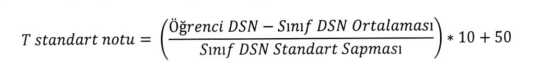

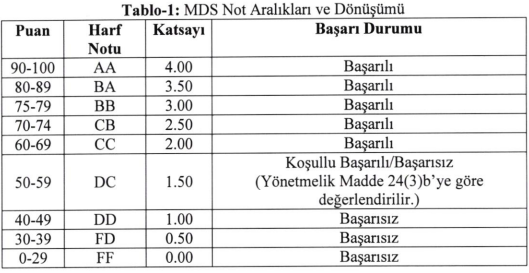

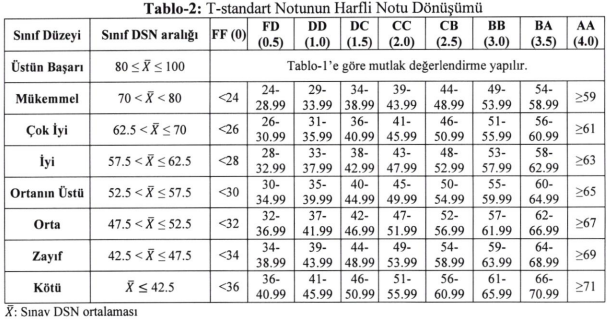

In [36]:
final_puans.describe().T

,count,mean,std,min,25%,50%,75%,max
Puan,150.0,71.800133,4.590202,61.22,68.315,71.29,75.15,85.4


In [37]:
print("Sınıf ortalama standart sapması : {}".format(final_puans.describe().T["std"][0]))
print("Sınıf ortalaması : {}".format(final_puans.describe().T["mean"][0]))
class_dsn_std = final_puans.describe().T["std"][0]
class_dsn_avg = final_puans.describe().T["mean"][0]

Sınıf ortalama standart sapması : 4.59020228629227
Sınıf ortalaması : 71.80013333333333


In [38]:
def student_grade_calculator(x,cgc):
    if x < cgc: 
        grade = "FF"
    elif cgc <= x and x <= (cgc+5-0.01):
        grade = "FD"
    elif (cgc+5) <= x and x <= (cgc+10-0.01):
        grade = "DD"
    elif (cgc+10) <= x and x <= (cgc+15-0.01):
        grade = "DC"
    elif (cgc+15) <= x and x <= (cgc+20-0.01):
        grade = "CC"
    elif (cgc+20) <= x and x <= (cgc+25-0.01):
        grade = "CB"
    elif (cgc+25) <= x and x <= (cgc+30-0.01):
        grade = "BB"
    elif (cgc+30) <= x and x <= (cgc+35-0.01):
        grade = "BA"
    elif (cgc+35) <= x:
        grade = "AA"
    grade_list.append(grade)

In [39]:
def class_grade_calculator(x):
    if 80 <= class_dsn_avg and class_dsn_avg <= 100:
        if x < 30: 
            grade = "FF"
        elif 90 <= x and x <= 100:
            grade = "AA"
        elif 80 <= x and x < 90:
            grade = "BA"
        elif 75 <= x and x < 80:
            grade = "BB"
        elif 70 <= x and x < 75:
            grade = "CB"
        elif 60 <= x and x < 70:
            grade = "CC"
        elif 50 <= x and x < 60:
            grade = "DC"
        elif 40 <= x and x < 50:
            grade = "DD"
        elif 30 <= x and x < 40:
            grade = "FD"
            
    elif 70 < class_dsn_avg and class_dsn_avg < 80:
        student_grade_calculator(x,24)
        
    elif 62.5 < class_dsn_avg and class_dsn_avg <= 70:
        student_grade_calculator(x,26)
        
    elif 57.5 < class_dsn_avg and class_dsn_avg <= 62.5:
        student_grade_calculator(x,28)
        
    elif 52.5 < class_dsn_avg and class_dsn_avg <= 57.5:
        student_grade_calculator(x,30)
        
    elif 47.5 < class_dsn_avg and class_dsn_avg <= 52.5:
        student_grade_calculator(x,32)
        
    elif 42.5 < class_dsn_avg and class_dsn_avg <= 47.5:
        student_grade_calculator(x,34)
        
    elif class_dsn_avg and 42.5:
        student_grade_calculator(x,36)
        

In [40]:
grade_list = []
t_list = []
for student_avg in final_point_data:
    t_puan = ((student_avg - class_dsn_avg)/(class_dsn_std))*10 + 50
    t_list.append(t_puan)
    class_grade_calculator(t_puan)

In [41]:
Grades_dict = {"First Name" : final_data["First Name"],
              "Last Name" : final_data["First Name"],
              "Grade" : grade_list}

In [42]:
GRADES = pd.DataFrame(data = Grades_dict, index=final_data.index)

In [43]:
GRADES.head()

,First Name,Last Name,Grade
NetID,,,
wxb12345,Woody,Woody,CB
mxl12345,Malaika,Malaika,BB
txj12345,Traci,Traci,BB
jgf12345,Gregg,Gregg,CC
smj00936,Stacy,Stacy,AA
